# **CSC-104 Computer Programming II | Spring 2021 | Carlos Paniagua**
## Quiz 2: Exploring sampling distributions for sample proportions

## DONNIE AIKINS

### Task 1. Construct an array with 1000 integers from 0 to 20. Call this array `population`. 

In [1]:
%precision 3
import numpy as np
import scipy.stats as st
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import random

np.random.seed(32569)
population = np.array([random.randint(0, 20) for i in range(1000)])

### Task 2. Build a function `get_proportion` that takes an array `arr` of integers and a number `k` and returns the proportion of numbers in `arr` that are greater than `k`.

In [2]:
def get_proportion(array, m):
    count = 0
    for i in array:
        if i > m:
            count += 1
    return count/len(array)

### Task 3. Find the proportion of numbers in `population` that are greater than 15. Store this in a variable named `p`.

In [3]:
p = get_proportion(population, 15)
p

0.241

### Pretend for a moment that we don't know the value of `p` and that we don't have access to the whole `population`. How could we estimate the population proportion $p?$ Think about this for 5 seconds and move on.

### To estimate `p` we could take samples from `population`. 

### Task   4. Take a random sample of size 30 from `population` and call it `sample1`. Using `get_proportion`, obtain the proportion of members in `sample` that are greater than 15. 

In [4]:
np.random.seed(456)
sample1= []
for i in range(30):
    sample1.append(population[random.randint(0, len(population))])
print('Sample: ',sample1,'\nObserved proportion: ',get_proportion(sample1,15))

Sample:  [0, 3, 18, 13, 20, 19, 13, 3, 1, 19, 3, 7, 17, 10, 14, 3, 3, 1, 10, 17, 1, 20, 17, 19, 11, 8, 0, 6, 11, 12] 
Observed proportion:  0.3


### How close to the true population proportion `p` is it? One way to measure this is the *relative error* of an estimate $\hat{p}$ with respect to a reference $p:$ $$\text{relative error}=\dfrac{|\hat{p}-p|}{p}.$$ 
### Task 5. Construct a function `rel_error` that takes two numbers `est`, `ref` and returns the relative error of `est` with respect to `ref`. 



In [5]:
def rel_err(est, ref):
    return abs(est-ref)/(ref)

### Task 6. Now compute the relative error of your estimate from `sample1`.

In [6]:
rel_err((get_proportion(sample1, 15)), p)

0.245

### Was this first estimate any good? Maybe you got lucky (or not!). 
### Task 7. Take a second sample `sample2` and see what you get. That is, repeat tasks 4-6 for the new sample. Take even larger samples if you like (40 or more)

In [7]:
np.random.seed(123)
sample2= []
for i in range(40):
    sample2.append(population[random.randint(0, len(population))])
print('Sample: ',sample2,'\nObserved proportion: ',get_proportion(sample2,15),'\nRelative error: ', rel_err((get_proportion(sample2, 15)), p))

Sample:  [10, 7, 4, 17, 12, 11, 9, 5, 4, 16, 20, 20, 15, 17, 8, 0, 11, 11, 10, 7, 16, 3, 4, 2, 0, 16, 10, 19, 13, 13, 11, 16, 9, 13, 12, 19, 20, 2, 4, 19] 
Observed proportion:  0.3 
Relative error:  0.24481327800829875


In [8]:
np.random.seed(123)
sample3= []
for i in range(100):
    sample3.append(population[random.randint(0, len(population))])
print('Sample: ',sample3,'\nObserved proportion: ',get_proportion(sample3,15),'\nRelative error: ', rel_err((get_proportion(sample3, 15)), p))

Sample:  [17, 1, 4, 18, 0, 9, 8, 17, 9, 19, 6, 0, 2, 5, 19, 13, 4, 15, 19, 5, 4, 2, 16, 15, 20, 1, 11, 7, 15, 6, 15, 7, 1, 12, 2, 5, 1, 8, 1, 6, 18, 10, 0, 5, 13, 5, 16, 8, 16, 18, 12, 20, 16, 7, 18, 2, 19, 5, 1, 0, 16, 18, 2, 4, 11, 11, 20, 3, 7, 13, 0, 13, 11, 13, 9, 16, 16, 18, 1, 2, 7, 11, 1, 14, 0, 11, 14, 14, 1, 10, 14, 8, 16, 7, 2, 12, 20, 4, 7, 3] 
Observed proportion:  0.24 
Relative error:  0.004149377593360999


### Any luck?

### Task 8. Do this many times and compute the average of all the proportions you get. Namely,
1. In a data structure of your choice (call it `sampled_props`) record the means of 10,000 random samples of size 30 from `population`.
2. Obtain the mean and standard deviation for `sampled_props`.
3. Produce a histogram for `sampled_props`.
4. Compare (using `rel_err`) the mean of `sampled_props` with the true population proportion (task 3).


In [9]:
sampled_props = pd.DataFrame(columns= ['xbar'])
for x in range(0, 10000):
    temp = random.sample(list(population), 30)
    sampled_props = sampled_props.append({'xbar':get_proportion(temp, 15)}, ignore_index=True)
    temp.clear()

Mean: 0.23978999999999936
Standard Deviation: 0.07651076293724596
Relative Error: 0.005020746887969408


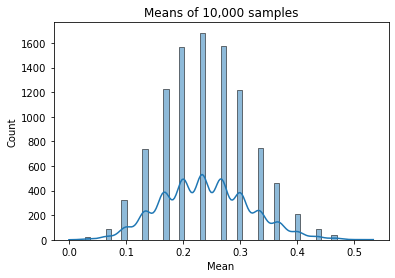

In [10]:
print("Mean: {}".format(sampled_props['xbar'].mean()))
print("Standard Deviation: {}".format(sampled_props['xbar'].std()))
print("Relative Error: {}".format(rel_err(sampled_props['xbar'].mean(), p)))
sns.histplot(data= sampled_props, x='xbar', kde=True)
plt.title("Means of 10,000 samples")
plt.xlabel("Mean")
plt.show()

### Did you start to get lucky already?

### Task 9. Repeat task 8 to make sure this wasn't an accident. Ensure your samples are truly random (do not use a seed).

In [11]:
sampled_props2 = pd.DataFrame(columns= ['xbar'])
for x in range(0, 10000):
    temp = random.sample(list(population), 30)
    sampled_props2 = sampled_props2.append({'xbar':get_proportion(temp, 15)}, ignore_index=True)
    temp.clear()

Mean: 0.24008999999999983
Standard Deviation: 0.076589386007203
Relative Error: 0.003775933609959173


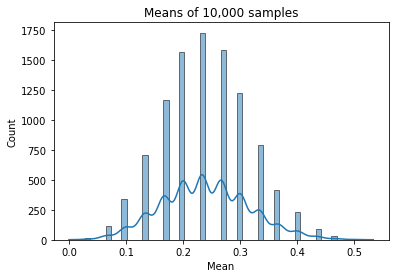

In [12]:
print("Mean: {}".format(sampled_props2['xbar'].mean()))
print("Standard Deviation: {}".format(sampled_props2['xbar'].std()))
print("Relative Error: {}".format(rel_err(sampled_props2['xbar'].mean(), p)))
sns.histplot(data= sampled_props2, x='xbar', kde=True)
plt.title("Means of 10,000 samples")
plt.xlabel("Mean")
plt.show()

### Task 10. Write down a few sentences summarizing your findings.
1. Was the mean of `sampled_props` close to the true population mean?
2. What was the shape of the distribution of `sampled_props`?
3. If you increased the sample size, what happened to the standard deviation of `sampled_props`?




1. f
2. `sampled_props` approximately had the shape of a normal distribution. 
3. If the sample size were to be increased, the standard deviation of `sampled_props` would decrease because in most distributions, the standard deviation is calculated by having the sample size in the denominator. Increasing the denominator would decrease the overall standard deviation. Using the normal distribution approximation - the standard deviation would be $\sqrt(\frac{p(1-p)}{n})$